In [8]:
import matplotlib.pyplot as plt
from itertools import product
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [10]:
# Read the data
df = pd.read_csv("./data/aggregate_data.csv")

/var/folders/j8/3by2_yfj2tb3sn3c_6m1s3rc0000gn/T/ipykernel_78684/810398866.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stress_level', data=df, palette='viridis')


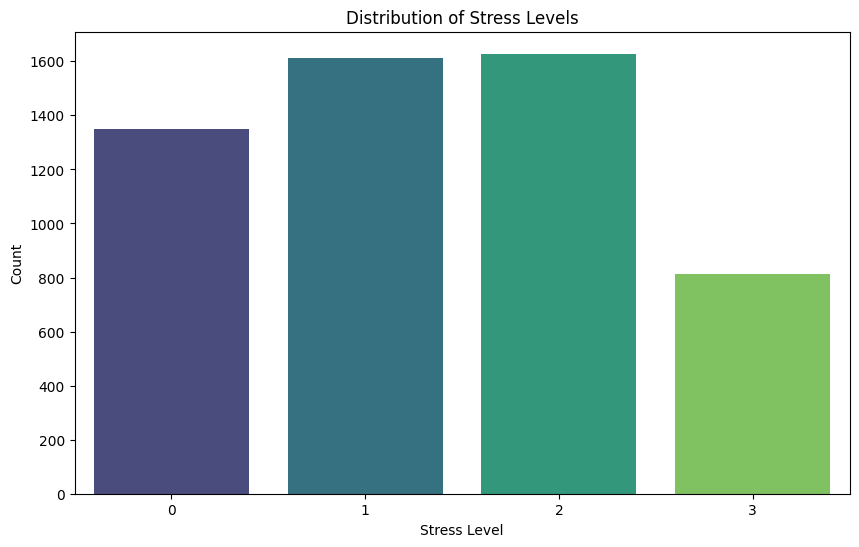

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='stress_level', data=df, palette='viridis')
plt.title('Distribution of Stress Levels')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler

In [13]:
# Define features (X) and target variable (y)
X = df.drop(columns=['trial', 'experimenter', 'heart_rate', 'stress_level'])
y = df['stress_level']

scaler = StandardScaler()
scaler = scaler.fit(X)
X = scaler.transform(X)

In [14]:
def train_test_split_by_experimenter(X: pd.DataFrame, y: pd.Series, data: pd.DataFrame, experimenter_name: str):
    
    """
    Splits the features and target into training and testing sets based on the experimenter.
    
    Parameters:
    X (pd.DataFrame): The feature DataFrame.
    y (pd.Series): The target Series.
    data (pd.DataFrame): The input DataFrame containing a column named 'experimenter'.
    experimenter_name (str): The name of the experimenter to filter by.
    
    Returns:
    pd.DataFrame, pd.DataFrame, pd.Series, pd.Series: X_train, X_test, y_train, y_test
    """
    
    train_indices = data[data['experimenter'] != experimenter_name].index
    test_indices = data[data['experimenter'] == experimenter_name].index
    
    X_train = X.loc[train_indices]
    X_test = X.loc[test_indices]
    y_train = y.loc[train_indices]
    y_test = y.loc[test_indices]
    
    return X_train, X_test, y_train, y_test

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
y_test_one_hot = label_binarize(y_test, classes=np.unique(y_test))

# **Random Forest**

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
# random forest classification:
y_train = [int(i) for i in y_train]
y_test = [int(i) for i in y_test]

from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier()

from sklearn.model_selection import GridSearchCV
param_dict = {'n_estimators': [50, 100, 120, 150, 200, 300],
             'max_depth':[5, 8, 10, 15, 25, 30]}
estimator = GridSearchCV(estimator, param_grid = param_dict, cv=5)
estimator.fit(X_train, y_train)
y_predict = estimator.predict(X_test)

from sklearn.metrics import accuracy_score

rf_accuracy = accuracy_score(y_test, y_predict)

print("Accuracy:", round(rf_accuracy, 3))
### Grid Search model evaluation:
# method 1: compare y_test with y_predict
print('y_predict:\n', y_predict)
print('true value versus prediction', y_test == y_predict)
# method 2: calculate precision score
score = estimator.score(X_test, y_test)
print('precision:\n', score)
# best_params_
print("Best parameter:\n", estimator.best_params_)
# best_score_
print("Best score:\n", estimator.best_score_)
# best_estimator_
print("Best estimator:\n", estimator.best_estimator_)
# cv_results_
print("Cross-validation results:\n", estimator.cv_results_)

score = estimator.score(X_test, y_test)

Accuracy: 0.855
y_predict:
 [3 1 2 ... 2 0 1]
true value versus prediction [ True  True  True ... False  True  True]
precision:
 0.8549222797927462
Best parameter:
 {'max_depth': 30, 'n_estimators': 200}
Best score:
 0.8252719550623373
Best estimator:
 RandomForestClassifier(max_depth=30, n_estimators=200)
Cross-validation results:
 {'mean_fit_time': array([0.38758979, 0.77579546, 0.94536495, 1.18680978, 1.5822082 ,
       2.38410912, 0.55815492, 1.11956515, 1.34354348, 1.62687702,
       2.16899452, 3.36903763, 0.64699221, 1.27244282, 1.54602962,
       1.93177142, 2.53696384, 3.81064811, 0.74322238, 1.48656912,
       1.79393401, 2.24305687, 2.97957115, 4.4695941 , 0.78943577,
       1.57677917, 1.86498113, 2.25914941, 3.01334696, 5.3032506 ,
       0.84196115, 1.61645613, 1.86814404, 2.31979036, 3.12947111,
       4.63592496]), 'std_fit_time': array([9.06857444e-03, 1.07496797e-02, 4.43312758e-03, 6.21436638e-03,
       7.78405532e-03, 6.86064567e-03, 1.04737296e-02, 1.75427083e-02,

In [18]:
# best result from grid search
estimator = RandomForestClassifier(max_depth=8, n_estimators=120)
estimator.fit(X_train, y_train)
y_predict = estimator.predict(X_test)

from sklearn.metrics import accuracy_score

rf_accuracy = accuracy_score(y_test, y_predict)

print("Accuracy:", round(rf_accuracy, 3))

Accuracy: 0.791


In [19]:
# Calculation of F1, precision, accuracy, and recall
from sklearn.metrics import accuracy_score, recall_score, precision_score ,f1_score#, roc_curve, roc_auc_score
# fpr, tpr, thresholds = roc_curve(y_test, y_predict)
# auc = roc_auc_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict, average='weighted')
print('F1 Score:', f1)
precision = precision_score(y_test, y_predict, average = 'weighted')
accuracy = accuracy_score(y_test, y_predict)
recall = recall_score(y_test, y_predict, average = 'weighted')
print(precision, "\n",  accuracy, '\n', recall)

F1 Score: 0.7918671966643148
0.7999491529345784 
 0.7905255366395263 
 0.7905255366395263


In [20]:
y_pred_proba = estimator.predict_proba(X_test)

In [21]:
accuracy = accuracy_score(y_test, y_predict)
print("Accuracy:", round(accuracy, 3))

Accuracy: 0.791


In [22]:
roc_auc = roc_auc_score(y_test_one_hot, y_pred_proba, multi_class='ovo')
print("ROC AUC:", round(roc_auc, 4))

ROC AUC: 0.9517


In [23]:
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [24]:
y_score = estimator.fit(X_train, y_train).predict_proba(X_test)

In [25]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_test)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(1351, 4)

In [26]:
class_of_interest = 2
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

2

In [27]:
print(np.unique(y_test))
print(np.unique(y_predict))

[0 1 2 3]
[0 1 2 3]


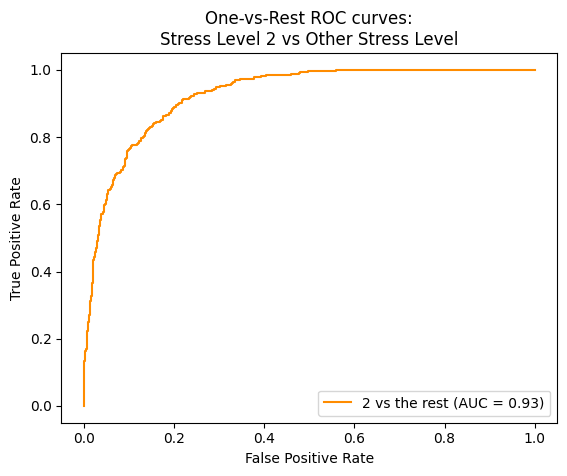

In [28]:
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
    # plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"One-vs-Rest ROC curves:\nStress Level {2} vs Other Stress Level",
)

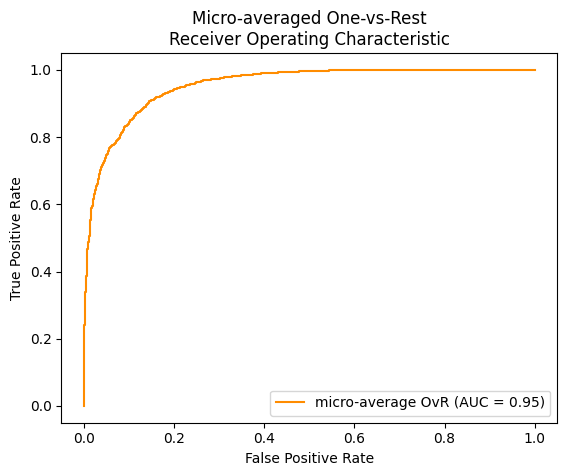

In [29]:
display = RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
    # plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Micro-averaged One-vs-Rest\nReceiver Operating Characteristic",
)

In [30]:
from sklearn.metrics import auc, roc_curve, roc_auc_score
macro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="macro",
)

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{macro_roc_auc_ovr:.2f}")
fpr, tpr, roc_auc_dict = dict(), dict(), dict()

Macro-averaged One-vs-Rest ROC AUC score:
0.95


In [32]:
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
    roc_auc_dict[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

mean_tpr = np.zeros_like(fpr_grid)

for i in range(len(np.unique(y_test))):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])

mean_tpr /= len(np.unique(y_test))

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc_dict["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc_dict['macro']:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.95


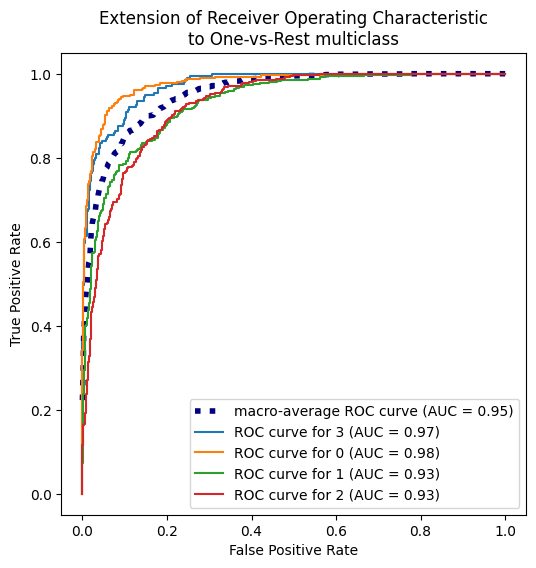

In [33]:
from itertools import cycle

fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc_dict['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"])

for class_id, color in zip(range(len(np.unique(y))), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id-1],
        y_score[:, class_id-1],
        name=f"ROC curve for {np.unique(y_test)[class_id-1]}",
        color=color,
        ax=ax,
        # plot_chance_level=(class_id == 2),
    )

_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass",
)

In [34]:
def backward_feature_selection_roc(df, model, best_roc_auc):

    best_roc_auc = best_roc_auc

    drop_cols = ['id', 'time_period_start', 'time_period_end', 'tomorrow_mood_mean', 'tomorrow_mood_class']

    feature_deleted = True

    while feature_deleted:

        feature_deleted = False

        features = df.drop(columns=drop_cols).columns

        for feature in features:

            X = df.drop(columns=drop_cols).drop(columns=[feature])
            y = df['tomorrow_mood_class']

            print(f"current feature: {feature} / {len(X.columns)}")

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
            y_test_one_hot = label_binarize(y_test, classes=np.unique(y_test))

            model.fit(X_train, y_train)
            y_pred_proba = model.predict_proba(X_test)

            roc_auc = roc_auc_score(y_test_one_hot, y_pred_proba, multi_class='ovo')

            print(f"ROC-AUC: {roc_auc}")

            if roc_auc > best_roc_auc:
                feature_deleted = True
                print(f"BETTER")
                best_roc_auc = roc_auc
                df = df.drop(columns=[feature])

    print(f"result: {len(df.drop(columns=drop_cols).columns)} features")
    return df, best_roc_auc

In [ ]:
feature_selection_df, best_auc = backward_feature_selection_roc(aggregated_data_5, estimator, roc_auc)

In [ ]:
aggregated_data_5 = feature_selection_df

In [ ]:
aggregated_data_5

In [ ]:
best_auc